In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Food _Waste_Data.csv')
df

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source
0,Afghanistan,126,82,3109153,16,594982,28,1051783,Very Low Confidence,4,Southern Asia,https://www.unep.org/resources/report/unep-foo...
1,Albania,127,83,238492,16,45058,28,79651,Very Low Confidence,8,Southern Europe,https://www.unep.org/resources/report/unep-foo...
2,Algeria,135,91,3918529,16,673360,28,1190335,Very Low Confidence,12,Northern Africa,https://www.unep.org/resources/report/unep-foo...
3,Andorra,123,84,6497,13,988,26,1971,Low Confidence,20,Southern Europe,https://www.unep.org/resources/report/unep-foo...
4,Angola,144,100,3169523,16,497755,28,879908,Very Low Confidence,24,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...
...,...,...,...,...,...,...,...,...,...,...,...,...
209,Venezuela (Boliv. Rep. of),116,72,2065461,16,445994,28,788407,Very Low Confidence,862,Latin America and the Caribbean,https://www.unep.org/resources/report/unep-foo...
210,Viet Nam,120,76,7346717,16,1508689,28,2666991,Very Low Confidence,704,South-eastern Asia,https://www.unep.org/resources/report/unep-foo...
211,Yemen,148,104,3026946,16,456099,28,806270,Very Low Confidence,887,Western Asia,https://www.unep.org/resources/report/unep-foo...
212,Zambia,122,78,1391729,16,279350,28,493822,Very Low Confidence,894,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...


In [3]:
df.isnull().sum()

Country                                   0
combined figures (kg/capita/year)         0
Household estimate (kg/capita/year)       0
Household estimate (tonnes/year)          0
Retail estimate (kg/capita/year)          0
Retail estimate (tonnes/year)             0
Food service estimate (kg/capita/year)    0
Food service estimate (tonnes/year)       0
Confidence in estimate                    0
M49 code                                  0
Region                                    0
Source                                    0
dtype: int64

In [4]:
df.describe()

,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),M49 code
count,214.000000,214.000000,2.140000e+02,214.000000,2.140000e+02,214.000000,2.140000e+02,214.000000
mean,126.794393,84.294393,2.658896e+06,15.116822,5.520454e+05,27.383178,1.138859e+06,433.971963
std,22.157879,18.313705,8.596906e+06,5.767840,2.195578e+06,6.508420,5.380459e+06,252.185786
min,61.000000,33.000000,8.500000e+02,3.000000,1.380000e+02,3.000000,2.760000e+02,4.000000
25%,115.000000,74.000000,6.831550e+04,13.000000,1.250925e+04,26.000000,2.239125e+04,219.000000
50%,123.000000,80.000000,5.205080e+05,16.000000,1.006500e+05,28.000000,1.884660e+05,432.000000
75%,137.750000,95.000000,2.111314e+06,16.000000,3.568158e+05,28.000000,6.307618e+05,645.250000
max,260.000000,189.000000,9.164621e+07,79.000000,2.242470e+07,90.000000,6.537774e+07,894.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Country                                 214 non-null    object
 1   combined figures (kg/capita/year)       214 non-null    int64 
 2   Household estimate (kg/capita/year)     214 non-null    int64 
 3   Household estimate (tonnes/year)        214 non-null    int64 
 4   Retail estimate (kg/capita/year)        214 non-null    int64 
 5   Retail estimate (tonnes/year)           214 non-null    int64 
 6   Food service estimate (kg/capita/year)  214 non-null    int64 
 7   Food service estimate (tonnes/year)     214 non-null    int64 
 8   Confidence in estimate                  214 non-null    object
 9   M49 code                                214 non-null    int64 
 10  Region                                  214 non-null    object
 11  Source

In [6]:
df['Total_Waste_Tonnes'] = (df['Household estimate (tonnes/year)'] +
    df['Retail estimate (tonnes/year)'] +
    df['Food service estimate (tonnes/year)'])

In [7]:
total_food_waste_by_country = df[['Country', 'Total_Waste_Tonnes']].sort_values(by='Total_Waste_Tonnes', ascending=False)

In [8]:
total_food_waste_by_country.head(10)

,Country,Total_Waste_Tonnes
39,China,179448659
89,India,127910071
139,Nigeria,46640844
204,United States of America,45446091
90,Indonesia,32653175
144,Pakistan,25322390
25,Brazil,21714282
123,Mexico,17501891
65,Ethiopia,15178932
150,Philippines,14014661


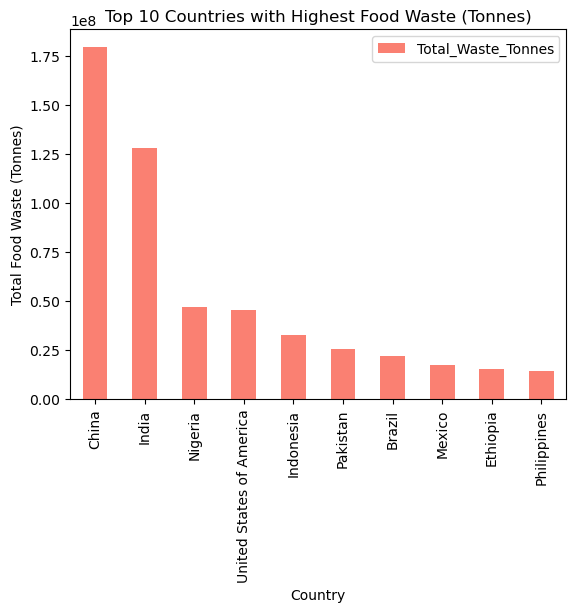

In [9]:
total_food_waste_by_country.head(10).set_index('Country').plot(kind='bar', color='salmon')
plt.title('Top 10 Countries with Highest Food Waste (Tonnes)')
plt.xlabel('Country')
plt.ylabel('Total Food Waste (Tonnes)')
plt.show()

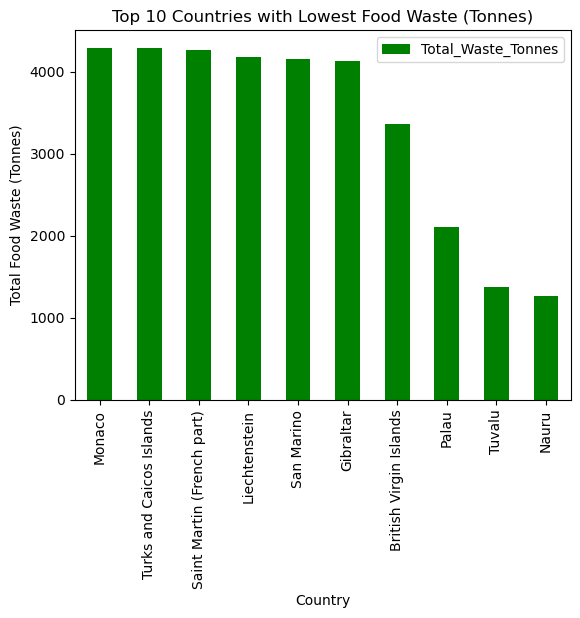

In [20]:
total_food_waste_by_country.tail(10).set_index('Country').plot(kind='bar', color='green')
plt.title('Top 10 Countries with Lowest Food Waste (Tonnes)')
plt.xlabel('Country')
plt.ylabel('Total Food Waste (Tonnes)')
plt.show()

In [10]:
waste_by_sector = {'Household': df['Household estimate (tonnes/year)'].sum(),
    'Retail': df['Retail estimate (tonnes/year)'].sum(),
    'Food Service': df['Food service estimate (tonnes/year)'].sum()}

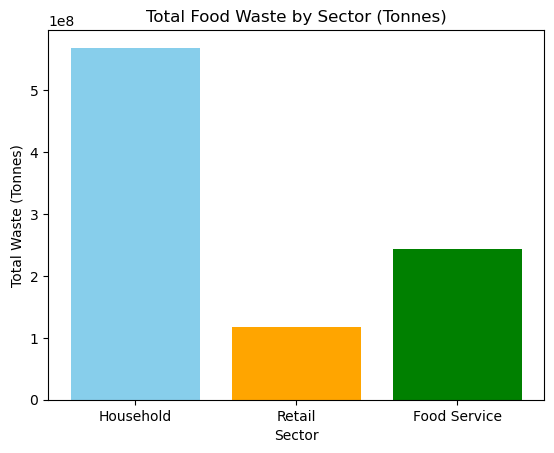

In [11]:
plt.bar(waste_by_sector.keys(), waste_by_sector.values(), color=['skyblue', 'orange', 'green'])
plt.title('Total Food Waste by Sector (Tonnes)')
plt.xlabel('Sector')
plt.ylabel('Total Waste (Tonnes)')
plt.show()

In [21]:
df['Per_Capita_Waste_kg'] = (df['Household estimate (kg/capita/year)'] +
    df['Retail estimate (kg/capita/year)'] +
    df['Food service estimate (kg/capita/year)'])

In [23]:
top_10_per_capita_waste = df[['Country', 'Per_Capita_Waste_kg']].sort_values(by='Per_Capita_Waste_kg', ascending=False).head(10)

<Figure size 1000x600 with 0 Axes>

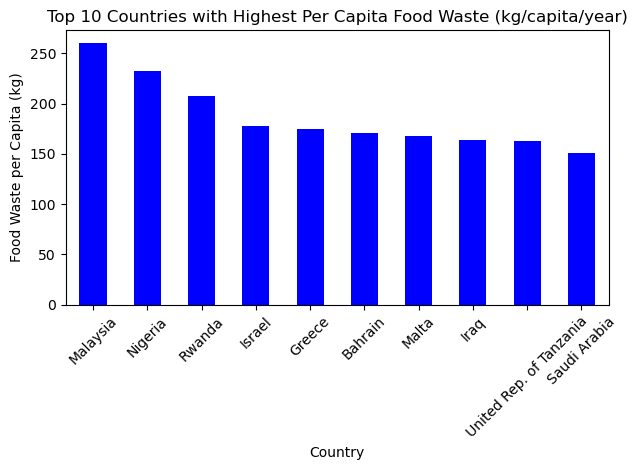

In [25]:
plt.figure(figsize=(10, 6))
top_10_per_capita_waste.set_index('Country').plot(kind='bar', color='blue', legend=False)
plt.title('Top 10 Countries with Highest Per Capita Food Waste (kg/capita/year)')
plt.xlabel('Country')
plt.ylabel('Food Waste per Capita (kg)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
bottom_10_per_capita_waste = df[['Country', 'Per_Capita_Waste_kg']].sort_values(by='Per_Capita_Waste_kg').head(10)

<Figure size 1000x600 with 0 Axes>

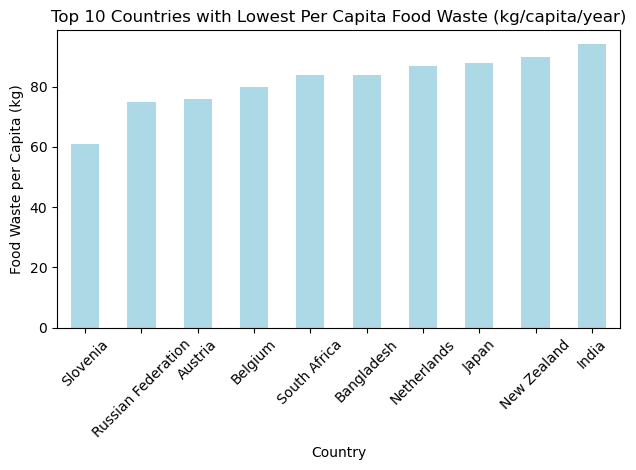

In [28]:
plt.figure(figsize=(10, 6))
bottom_10_per_capita_waste.set_index('Country').plot(kind='bar', color='lightblue', legend=False)
plt.title('Top 10 Countries with Lowest Per Capita Food Waste (kg/capita/year)')
plt.xlabel('Country')
plt.ylabel('Food Waste per Capita (kg)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()